# Gestion des ressources et du ramasse-miettes (Garbage Collector)

## Gestion de mémoire en .NET

Tout comme en Java, .NET s’occupe de la gestion de mémoire des objets (l’allocation et dé-allocation d’espace mémoire).

La gestion de mémoire est faite au niveau du CLR à l’aide du ramasse-miettes (Garbage Collector).

## Références

En .NET, lorsqu’un objet est créé, il peut aller à deux places en mémoire.
- Sur la pile si c’est un objet de type « valeur ».
- Sur le tas si c’est un objet de type « référence ».

Techniquement, une variable contient toujours une « référence » à l’objet et non sa valeur directement.
- Le CLR s’occupe de cette couche transparente automatiquement.


## Durée de vie d’un objet

La durée de vie d’un objet en .NET est simple.
- Si l’objet est sur la pile, celui-ci va être libéré aussitôt que toutes références à l’objet sortent hors de portée (out of scope)

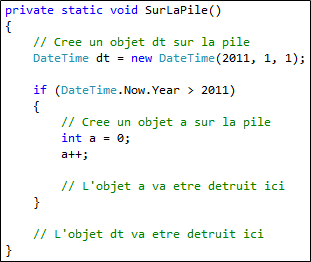

Si l’objet est sur le tas, celui-ci va être libéré quand le ramasse-miettes détermine qu’aucune autre référence à l’objet n’existe à l’intérieur de l’application.

La libération d’espace mémoire pour les objets.

- Sur la pile est fait instantanément.
- Sur le tas est fait seulement à la prochaine itération de nettoyage par le CLR (ramasse-miettes).
- Un objet sur le tas peut donc prendre quelques secondes à quelques minutes à être libéré.

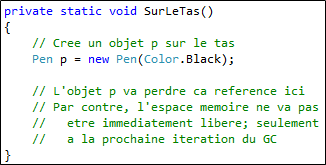

## `System.GC`

La classe statique `System.GC` contient plusieurs méthodes permettant l’interaction avec le ramasse-miettes.

Cette classe est rarement utilisée et devrait seulement être utilisée que si absolument nécessaire.
- Tel que l’interaction avec l’espace mémoire non gérée

Les méthodes les plus utilisées:
- `Collect()` : force la libération d’objets non utilisés sur le tas
- `SuppressFinalize(obj)` : indique que le destructeur de l’objet ne devrait jamais être appelé
- `WaitForPendingFinalizers()` : pause la fil exécution (thread) courante jusqu’à ce que tous les destructeurs ont été appelés


## Méthode Finalize

Tout objet contient une méthode protégée appelée« Finalize ».

Cette méthode est appelée juste avant qu’un objet est libéré.
- Elle sert habituellement à libérer des ressources non gérées.

Seulement les objets de type « référence » (donc une classe) peuvent surcharger/utiliser la méthode « Finalize ».

En C#, il est impossible de directement surcharger cette méthode; un destructeur doit être défini au lieu.

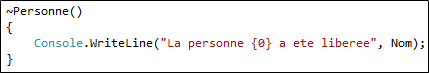

  > Note: le code du destructeur va seulement être appelé lors de la prochaine itération du ramasse-miettes et quand celui-ci détermine qu’aucune référence à l’objet n’existe à l’intérieur de l’application.

## Interface IDisposable

Tout comme la méthode « Finalize », l’implémentation de l’interface `IDisposable` sert à exécuter du code permettant la libération de ressources non gérées.

Cette interface requiert l’implémentation d’une méthode « Dispose ».



Cette interface devrait être utilisée au lieu de la méthode « Finalize » lorsque le code doit être exécuté aussitôt que possible (au lieu d’attendre pour la prochaine itération du ramasse-miettes).


Pour utiliser cette interface correctement, le programmeur doit appeler la méthode « Dispose » de l’objet manuellement aussitôt que l’objet n’est plus utilisé.
- Le ramasse-miettes ne va jamais appeler la méthode « `Dispose` »

**Exemple**

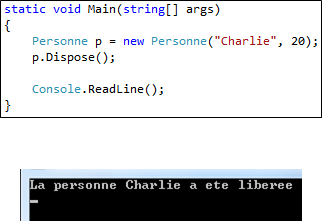

Lorsqu’un objet implémente l’interface `IDisposable`, il est possible d’utiliser le mot clé « `using` ».
- L’utilisation du mot clé « `using` » s’occupe automatiquement d’appeler la méthode « `Dispose` » lorsque la variable sort hors de portée (out of scope)
- L’utilisation de `using` requiert
  - Le mot clé « `using` »
  - La déclaration et initialisation de l’objet entre parenthèses
  - Le bloque de code indiquant la fin de l’utilisation de l’objet

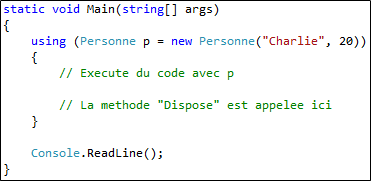

## Méthode « Finalize » et l’interface IDisposable

L’interface `IDisposable` fonctionne très bien si le programmeur se rappelle d’appeler la méthode « `Dispose` ».

Par contre, si le programmeur oublie d’appeler la méthode, les ressources ne vont jamais être libérées.

Une solution à ce problème est de combiner l’utilisation de la méthode « Finalize » (qui est toujours appelée d’une manière ou d’une autre) avec l’interface `IDisposable`.

Afin de ne pas libérer les mêmes ressources deux fois (qui pourraient causer des « erreurs catastrophiques »), il faut suivre un modèle très spécifique.

- Si le programmeur appelle `Dispose` (ou utilise le mot clé « `using` »), on libère toutes les ressources.
  - On doit également faire sûr que la méthode « Finalize » n’est pas appelée.
- Si le programmeur n’appelle pas la méthode Dispose (c’est donc la méthode « Finalize » qui va être automatiquement appelée), on libère donc les ressources non gérées seulement.

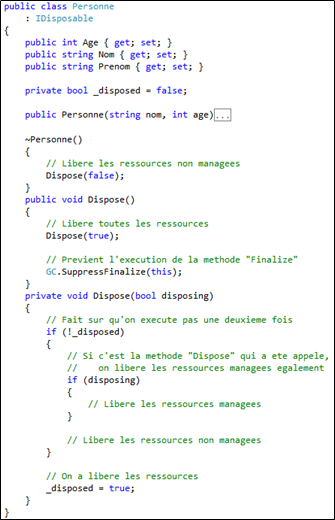

## Gestion d’exceptions et l’interface `IDisposable`

L'instruction « `using` » garantit que Dispose est appelé même si une exception se produit lors de l'appel de méthodes sur l'objet.

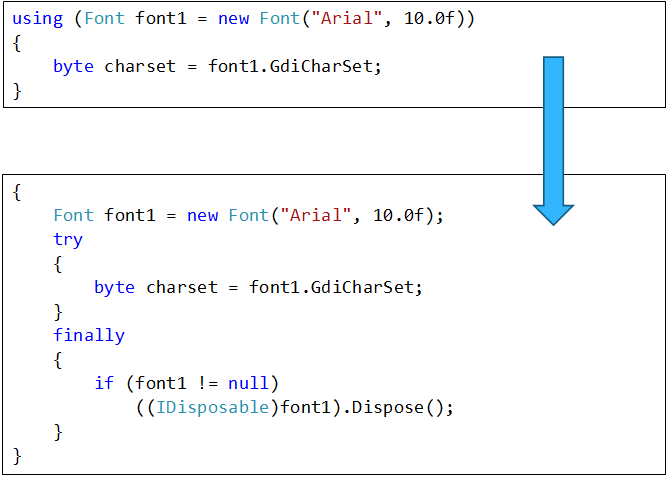